### Classical Mechanics - Week 3 Answers

### Last Week:
- We learned how to implement Euler's Method
- Solved for the motion of a particle factoring in a drag coefficient
- Compared the computational analysis of a particle versus it's expected path

### This Week:
- We will build around these concepts further with momentum
- Start implementing tests for our code (it's not as tedious as it sounds!)

#### Let's begin with a simple planetary problem

Suppose we have a planetary system in 2D that consists of a star with nearly the same properties of our own Sun and one planet with nearly the same properties of our Earth. 

##### How do we model this system?
Well that's a great question! We can use simple computational analysis with classical equations we are all familiar with. Let's begin by looking at one of the most essential equations of Physics, the force equation:

$F = G\dfrac{Mm}{r^2}$

Starting with just this simple let's try to use Euler's method from last week to model our planetary motion.

In [1]:
# Let's begin by importing our basic packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Pause and think:
The Earth-Sun distance, $r$, is about $1.5*10^8 km$, while the Earth mass, $m$, and Sun mass, $M$, are about $6*10^{24} kg$ and $2*10^{30} kg$ respectively. Those are huge numbers to compute for and will take up much computational time, especially to simulate the distance traveled by our planet every time step!

We solve these issues in scientific research by scaling our values and then performing further operations to make our units dimensionless. Here we will scale $r$ into Astronomical Units, $AU$, giving us: 

$1.5*10^8 km = 1 AU = r$.

Through inspection of the force equation we find that $v^2r = GM_s$, which will then give us acclerations: 

$a_x = \dfrac{-4{\pi^2}x}{r^3}$, $a_y = \dfrac{-4{\pi^2}y}{r^3}$

Let's begin our planet at position $(1,0)$ to keep things simple. By inspection we know that the initial velocity vector would then be $\vec{v_i} = (0,2\pi)$. 

NOW we can apply what we learned last week about Euler's Method to simluate this problem!

In [2]:
# Now let's initialize the values we do know. Simply fill out the values as we discussed above
from numpy import pi
from math import sqrt
r = 1 # The Earth is 1 AU away from the Sun
x_i = 1
y_i = 0
vx_i = 0
vy_i = 2*pi

vi = [vx_i,vy_i]
pos_i = [x_i, y_i]

Because we made our variables dimensionless, each time integer in our variable (1, 2, 3,...) is now one Earth Year, or about 365.25 days.

In [3]:
# Next, let's decide on our time to analyze, t - tf, and number of time steps, N, to decide on time step size, h.
t = 0
tf = 1 
N = 1000
h = (tf - t)/N
# Now we will initialize our array
v = np.zeros((N,2))
pos = np.zeros((N,2))
v[0] = vi
pos[0] = pos_i

In [4]:
# Let's simulate our motion now using Euler's method!
for i in range(0,N-1):
    pos[i+1] = pos[i] + h*v[i]
    v[i+1] = v[i] - h*4*pi**2*pos[i]/sqrt(pos[i,0]**2+pos[i,1]**2)**3

In [5]:
np.linalg.norm(pos[3])

1.0000592205484216

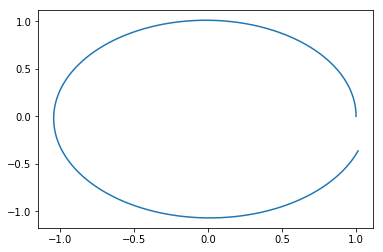

In [6]:
# Run this cell to plot the calculation position for 1 year
plt.plot(pos[:,0],pos[:,1])

# Q1.) What do you notice about our plot after 1 simulated Earth year?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answers #######

The planet doesn't end up back where it started.

The circle is broken.

####### Possible Answers #######

### The plot seems a bit strange, doesn't it? Let's create a function to analyze Euler's Mehtod a bit more. 

We are missing some steps in the funciton. Look at the previous cells, determine what is missing, and copy and past them into the correct place within the steps.

In [7]:
def EulerPlanet(tf,N):
    r = 1 # The Earth is 1 AU away from the Sun
    x_i = 1
    y_i = 0
    vx_i = 0
    vy_i = 2*pi
    
    h = (tf)/N
    
    v = np.zeros((N,2))
    pos = np.zeros((N,2))
    v[0] = [vx_i,vy_i]
    pos[0] = [x_i, y_i]
    
    for i in range(0,N-1):
        pos[i+1] = pos[i] + h*v[i]
        v[i+1] = v[i] - h*4*pi**2*pos[i]/sqrt(pos[i,0]**2+pos[i,1]**2)**3
    plt.grid()
    plt.plot(pos[:,0],pos[:,1])
    


Once you have finished setting the algorithm, use the next three cells to plot the planetary movement for t = 2, 3, and 4 with N = 1000 for each one.

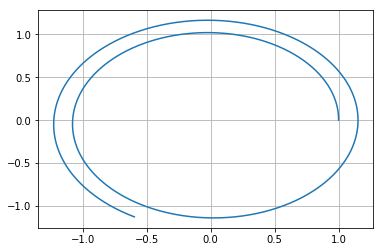

In [8]:
EulerPlanet(2,1000)

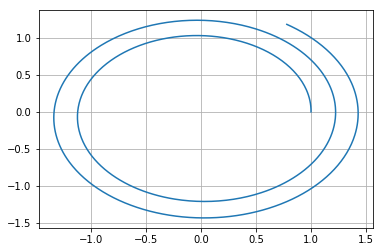

In [9]:
EulerPlanet(3,1000)

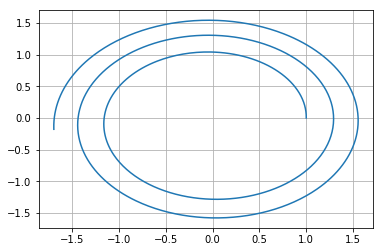

In [10]:
EulerPlanet(4,1000)

Seems like something isn't right. Let's modify our Euler function to see what is happening to our simulated planet's momentum.

In [21]:
def EulerPlanet_mom(tf,N):
    r = 1 # The Earth is 1 AU away from the Sun
    x_i = 1
    y_i = 0
    vx_i = 0
    vy_i = 2*pi
    
    h = (tf)/N
    
    v = np.zeros((N,2))
    pos = np.zeros((N,2))
    p = np.zeros(N)
    v[0] = [vx_i,vy_i]
    pos[0] = [x_i, y_i]
    m = 6*10**24 #kg; mass of the Earth like planet
    p[0] = np.linalg.norm(v[0])*m
    for i in range(0,N-1):
        pos[i+1] = pos[i] + h*v[i]
        v[i+1] = v[i] - h*4*pi**2*pos[i]/sqrt(pos[i,0]**2+pos[i,1]**2)**3
        p[i+1] = np.linalg.norm(v[i+1])*m
    plt.grid()
    plt.plot(pos[:,0],pos[:,1])
    print("Ratio of max and min momentum: ", min(p)/max(p))
    print("p_min: ", min(p))
    print("p_max: ", max(p))

Run the modified function to see the variance in momentum. 

Ratio of max and min momentum:  0.4935420617885458
p_min:  1.894833427746726e+25
p_max:  3.839254188143649e+25


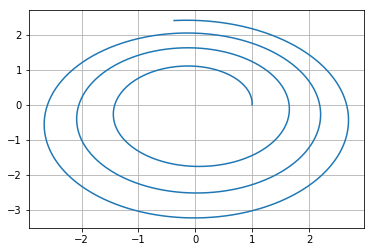

In [36]:
EulerPlanet_mom(10,1000)

# Q2.) Given t=10 & N = 10000, what is the ratio of our maximum and minimm momentum from Euler's Method?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

0.5

####### Possible Answer #######

### What does this tell us?

Although Euler's method is a useful tool for approximating motion, we need an extremely low number of step sizes to stay accurate. And even so, we can see that Euler's method does NOT conserve momentum. 

To solve this issue, we will now implement the Velocity Verlet Method! This should conserve momentum and provide a more stable planetary simulation. 

# Velocity Verlet Method:

Our updates will now also include second order differential equation instead of just first order like Euler's Method used. The algorithm will now have the following outline (notice the similarities and differences between the old and new method):

- $x_{i+1} = x_i + hv_i + \dfrac{h^2}{2}a_{xi}$, $y_{i+1} = x_i + hv_i + \dfrac{h^2}{2}a_{yi}$                

- $v_{i+1} = v_i + ha_i + \dfrac{h^2}{2}a'_i$

We can approximate $ha'= a_{i+1} - a_i$, giving us:

- $v_{i+1} = v_i + ha_i + \dfrac{h}{2}(a_{i+1} - a_i)$

We will now create an acclreation array and updated it through:

- $a_{x_{i+1}} = \dfrac{-4{\pi^2}x_{i+1}}{r^3}$, $a_{y_{i+1}} = \dfrac{-4{\pi^2}y_{i+1}}{r^3}$

We will once again start our planet at position (1,0). By inspection we know that the $\vec{v_i} = (0,2\pi)$ and $\vec{a_i} = (\dfrac{-4\pi}{r^3},0)$. To make things easier for updating, use "numpy.linalg.norm(pos[i+1])" to find r.

In [39]:
## Using the what we have done so far and outlined above, finish the Verlet function

def VerletPlanetary(tf,N):
    r = 1 # The Earth is 1 AU away from the Sun
    x_i = 1
    y_i = 0
    vx_i = 0
    vy_i = 2*pi
    ax_i = -4*pi**2*x_i/r**3
    ay_i = 0
    h = (tf)/N
    
    v = np.zeros((N,2))
    pos = np.zeros((N,2))
    a = np.zeros((N,2))
    p = np.zeros(N)
    v[0] = [vx_i,vy_i]
    pos[0] = [x_i, y_i]
    a[0] = [ax_i,ay_i]
    m = 6*10**24 #kg; mass of the Earth like planet
    p[0] = np.linalg.norm(v[0])*m
    for i in range(0,N-1):
        pos[i+1] = pos[i] + h*v[i] + (h**2/2)*a[i]
        a[i+1] = -4*pi**2*pos[i+1]/np.linalg.norm(pos[i+1])**3
        v[i+1] = v[i] + h*a[i] + (h/2)*(a[i+1] - a[i])
        p[i+1] = np.linalg.norm(v[i+1])*m
    
    plt.grid()
    plt.plot(pos[:,0],pos[:,1])
    print("Ratio of max and min momentum: ", min(p)/max(p))
    print("p_min: ", min(p))
    print("p_max: ", max(p))

Ratio of max and min momentum:  0.9980318961364871
p_min:  3.7624916075408154e+25
p_max:  3.769911184307752e+25


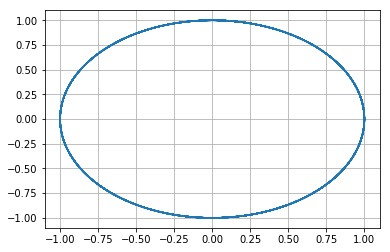

In [40]:
VerletPlanetary(10,1000)

# Q3.) Compare the momentum and planetary movement over time with the same variables on the Euler and Verlet implementations.

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answer #######

Momentum is NOT conserved in the Euler method. But it is conserved i

####### Possible Answer #######

# Notebook Wrap-up. 
Run the cell below and copy-paste your answers into their corresponding cells.

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/2Ax1XFtWZhjJOHym2" 
	width="100%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

# Good work! You've reached the end of another notebook!

We covered quite a bit with this week's notebook, so it's okay if you don't get everything at once. Feel free to play around with the code we've created to get a better grasp of how coding and Physics can be connected.